## 위치측위팀 HD Map 파서 제작 1탄
DGIST SHP 분석 및 커스텀마이징 가능성 조사

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
import ARTIV_parser.parser as parser

geopanda는 matplot 를 이용하여 출력하는데, 이 plot이 단순히  matplotlib의 모든 기능보단 wrapper의 성격이 가까워 직접 구현해보는 것도 좋은 경험임.

그리고  rviz같은 외부 프로그램에 출력할려면 rviz 버전  geopanda를 우리가 만들어야된다는 말로 해석하면 된다

In [6]:
!ls

ARTIV_parser	    dgist_a1.geojson	       josm-tested.jar
as.geojson	    dgist_a1.osm	       media
AutonomouStuff.osm  hdmap_package_part1.ipynb  __pycache__


![img](./media/pic1.png)


josm 을 실행하여, digst_a1 shp를 받아서, geojson으로 변환하였다.

In [7]:
parser

<module 'ARTIV_parser.parser' from '/home/shinkansan/Documents/map_study/hdmap_package/hdmap_package_part1/ARTIV_parser/parser.py'>

In [16]:
dgistMap = parser.loadMap("dgist_a1.geojson").getItem()
dgistMap = dgistMap.fillna('nodata') # 결측값 자료를 nodata로 치환합니다

In [17]:
# 어떤 데이터가 있는지 조사.
dgistMap.columns

Index(['BARRIER', 'CODE', 'DATE', 'HDUFID', 'LANECODE', 'LANETYPE', 'LNO',
       'R_LINKID', 'L_LINKID', 'building', 'lanes', 'side',
       'traffic_sign:forward', 'curb', 'REMARK', 'geometry'],
      dtype='object')

In [18]:
dgistMap

,BARRIER,CODE,DATE,HDUFID,LANECODE,LANETYPE,LNO,R_LINKID,L_LINKID,building,lanes,side,traffic_sign:forward,curb,REMARK,geometry
0,04,2,20180430,A1LA184A118233,99,999,7234,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,"LINESTRING (450933.974 3951158.172, 450934.607..."
1,99,1,20180430,A1LA184A111498,01,111,499,157C5304ZZ0102,nodata,nodata,nodata,nodata,nodata,nodata,nodata,"LINESTRING (450545.975 3951273.672, 450544.758..."
2,04,2,20180430,A1LA184A111640,99,999,641,nodata,157C5281RZ0102,nodata,nodata,nodata,nodata,nodata,nodata,"LINESTRING (450788.519 3951682.446, 450788.034..."
3,04,2,20180430,A1LA184A112829,99,999,1830,nodata,157C5312ZZ0102,nodata,nodata,nodata,nodata,nodata,nodata,"LINESTRING (450772.910 3951677.084, 450773.531..."
4,04,2,20180430,A1LA184A111122,99,999,123,nodata,157C5306RZ0102,nodata,nodata,nodata,nodata,nodata,nodata,"LINESTRING (450456.724 3951483.496, 450456.702..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,99,1,20180430,A1LA184A112344,01,111,1345,157C5316ZZ0102,nodata,nodata,nodata,nodata,nodata,nodata,nodata,"LINESTRING (451029.680 3951459.272, 451031.274..."
528,04,2,20180430,A1LA184A111703,99,999,704,nodata,157C5299ZZ0202,nodata,nodata,nodata,nodata,nodata,nodata,"LINESTRING (450907.524 3951184.342, 450907.003..."
529,04,2,20180430,A1LA184A112788,99,999,1789,nodata,157C5295RR0202,nodata,nodata,nodata,nodata,nodata,nodata,"LINESTRING (450967.978 3951143.494, 450967.908..."
530,99,1,20180430,A1LA184A112891,07,211,1892,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,"LINESTRING (450804.017 3951197.382, 450805.876..."


학정에서 내려오는 도로에다가 중앙선 (lanes:ceter) 연석(curb:1) 로 설정하였습니다. 

표지판은, 그냥 프리셋 다운받고, 맞는 사진을 찾아서 넣었습니다. (traffic_sign:forward:KR:101-2)

In [19]:
dgistMap.loc[dgistMap['curb'] != "nodata"]

,BARRIER,CODE,DATE,HDUFID,LANECODE,LANETYPE,LNO,R_LINKID,L_LINKID,building,lanes,side,traffic_sign:forward,curb,REMARK,geometry
147,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,1,nodata,"LINESTRING (450997.250 3951472.626, 450810.853..."
358,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,1,nodata,"LINESTRING (450695.680 3951265.434, 450746.829..."
456,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,1,nodata,"LINESTRING (450780.303 3951669.803, 450780.756..."


In [20]:
dgistMap.loc[dgistMap['lanes'] != "nodata"]

,BARRIER,CODE,DATE,HDUFID,LANECODE,LANETYPE,LNO,R_LINKID,L_LINKID,building,lanes,side,traffic_sign:forward,curb,REMARK,geometry
13,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,center,nodata,nodata,nodata,nodata,"LINESTRING (450787.595 3951648.597, 450774.958..."
357,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,2,nodata,nodata,nodata,nodata,POINT (450736.932 3951469.597)


lanes는 center같은 string도 넣을 수 있다. 하지만 뒤에 나오는 ros msg 개발을 위해서는 숫자로 기입하는 것을 추천한다
![img](./media/pic2.png)

In [69]:
dgistMap.loc[dgistMap['traffic_sign:forward'] != "nodata"]

,BARRIER,CODE,DATE,HDUFID,LANECODE,LANETYPE,LNO,R_LINKID,L_LINKID,lanes,side,traffic_sign:forward,curb,REMARK,geometry
36,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,right,KR:101-2,nodata,nodata,POINT (450792.597 3951642.712)
323,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,nodata,right,KR:307,nodata,nodata,POINT (450797.457 3951644.013)


연석은 모두 선의 집합체로 놓았고, geometry 컬럼에 보면 LINESTRING 객체로 설정되어 있음.

연석은 모두 노드 하나만 선택하고 지정하였고, geometry 컬럼에 보면 POINT 객체로 설정되어 있음.

표지판의 경우, 프리셋 설정에 의하여, 도로 어느쪽에 있는지 방향이 있어야 되기 때문에 side파람에 right 가 있음을 확인 할 수 있음.

### geometry의 형식은 GIS 표준 규칙을 따른다.

geometry의 객체들은 모두 python의 경우 shapely 라는 디펜던시로 읽을 수 있다. 여기에는 꽤 많은 객체들이 있는데, 실제 도로를 구현하기 위해 다양한 혹은 대표적인 객체들을 구현해 놓을 필요가 있다.

In [76]:
dgistType = set([type(i) for i in (dgistMap['geometry'])])

#예시로 OSM의 바이블격인 AutonomousStuff를 읽어보자면
asMap = parser.loadMap("as.geojson").getItem()
asType = set([type(i) for i in (asMap['geometry'])])

print(dgistType, '\n', asType)

{<class 'shapely.geometry.point.Point'>, <class 'shapely.geometry.linestring.LineString'>} 
 {<class 'shapely.geometry.point.Point'>, <class 'shapely.geometry.linestring.LineString'>}


#### 잉? 저번에 할 때는  MultiLineSTRING이 있어서, 중간중간 오류의 주범이었는데 왜 없지?

우선 짜다보면 오류가 생길 것이다. 항상 경계를 늦추지 말자


### geopanda 방식으로 점만 출력하고 싶다면, 

```
trafficSign = dgistMap.loc[dgistMap['traffic_sign:forward'] != "nodata"]
```

위 작성한 코드를 이용하면 된다. 표지판 부분만 분리하고. plot() 시에 
```
trafficSign.plot(ax = ax, color='red') 
```

색상 파라미터를 주면된다.

<IPython.core.display.Javascript object>


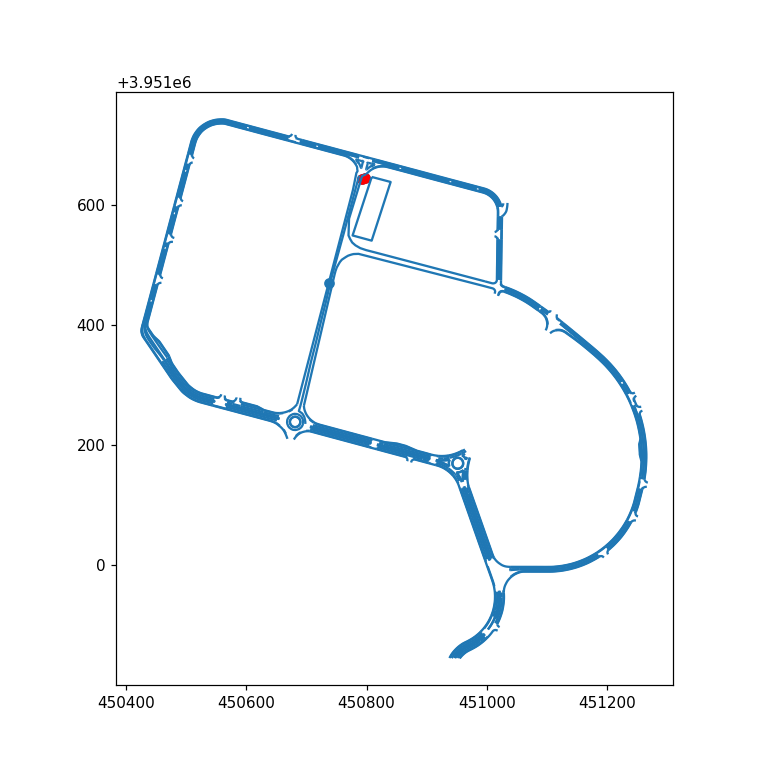

In [104]:
# 한 창에서 맵을 보여주기 위한 설정
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)
trafficSign = dgistMap.loc[dgistMap['traffic_sign:forward'] != "nodata"]
dgistMap.plot(ax = ax)
trafficSign.plot(ax = ax, color='red') 
plt.show()

In [46]:
parkdf

,BARRIER,CODE,DATE,HDUFID,LANECODE,LANETYPE,LNO,R_LINKID,L_LINKID,lanes,side,traffic_sign:forward,curb,REMARK,geometry
0,04,2,20180430,A1LA184A118233,99,999,7234,None,None,None,None,None,None,None,"LINESTRING (450933.974 3951158.172, 450934.607..."
1,99,1,20180430,A1LA184A111498,01,111,499,157C5304ZZ0102,None,None,None,None,None,None,"LINESTRING (450545.975 3951273.672, 450544.758..."
2,04,2,20180430,A1LA184A111640,99,999,641,None,157C5281RZ0102,None,None,None,None,None,"LINESTRING (450788.519 3951682.446, 450788.034..."
3,04,2,20180430,A1LA184A112829,99,999,1830,None,157C5312ZZ0102,None,None,None,None,None,"LINESTRING (450772.910 3951677.084, 450773.531..."
4,04,2,20180430,A1LA184A111122,99,999,123,None,157C5306RZ0102,None,None,None,None,None,"LINESTRING (450456.724 3951483.496, 450456.702..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,99,1,20180430,A1LA184A112344,01,111,1345,157C5316ZZ0102,None,None,None,None,None,None,"LINESTRING (451029.680 3951459.272, 451031.274..."
522,04,2,20180430,A1LA184A111703,99,999,704,None,157C5299ZZ0202,None,None,None,None,None,"LINESTRING (450907.524 3951184.342, 450907.003..."
523,04,2,20180430,A1LA184A112788,99,999,1789,None,157C5295RR0202,None,None,None,None,None,"LINESTRING (450967.978 3951143.494, 450967.908..."
524,99,1,20180430,A1LA184A112891,07,211,1892,None,None,None,None,None,None,None,"LINESTRING (450804.017 3951197.382, 450805.876..."


### Custom 규격을 완성하였다.

traffic sign이든 curb든, 쉽게 속성으로 추가하고, value를 통해 조회하면 된다.

이제, 실제 맵을 plot하며 발생하는 문제에 유연하게 대체하면 된다.

## Custom msg 만들기

ros, ros2 모두 custom msg는 만들기 쉽다. 

그리고 Python, C++ 모두 동일한 방식으로 로드하고 사용할 수 있어서, 정말 대단하게 느껴지는 대목이다.

**논의 사항**   
이제 우리가 논의해야되는 사항이다. msg는 일종의 편지로, 여러 출력 내용이 있다고 해서, 항상 꽉꽉 담아 보낼 수는 없다.

그래서 hdmap_msg.msg와 hdmap_array.msg를 둘다 제안한다.

우선  맵에서 DGIST shp 중에 a1만 출력하여 사용한  geojson결과는 다음과 같다.
'BARRIER', 'CODE', 'DATE', 'HDUFID', 'LANECODE', 'LANETYPE', 'LNO',
       'R_LINKID', 'L_LINKID', 'lanes', 'side', 'traffic_sign:forward', 'curb',
       'REMARK', 'geometry'   
   
여기서   traffic_sign 과 curb는 시험삼아 넣어본 것이다.    
여기서  columns의 순번은 Pandas 자동 생성으로 원래 geojson은 담겨 있지 않다.    

hdmap_msg는 한 행에 해당하는 데이터를 담는데 사용하고, hdmap_array는 이 hdmap_msg를  array형태로 지정하고자 한다.    

msg의 허용 데이터타입은 다음과 같고, Python과 C++의 공동 사용을 위해 아래 규칙을 이용하여한다.    
[msg data ADT](http://wiki.ros.org/msg)

> __hdmap_msg.msg__    
>
> Header header   
> uint32 id  
> uint8 lanes   
> uint8 building   
.... 등등


> __hdmap_array.msg__    
>
> Header header   
>   
> hdmap_msg[] map_array
